In [1]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)

print(keras.__version__)

from numpy.random import seed
seed(123)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
from keras.datasets import mnist

# Zad 
Pibierz zbiór danych

In [5]:
from keras.datasets import mnist
from keras.utils import np_utils
# from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0].shape)

nb_classes = len(np.unique(y_train))
n_samples = X_train.shape[0]

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))
(28, 28, 1)


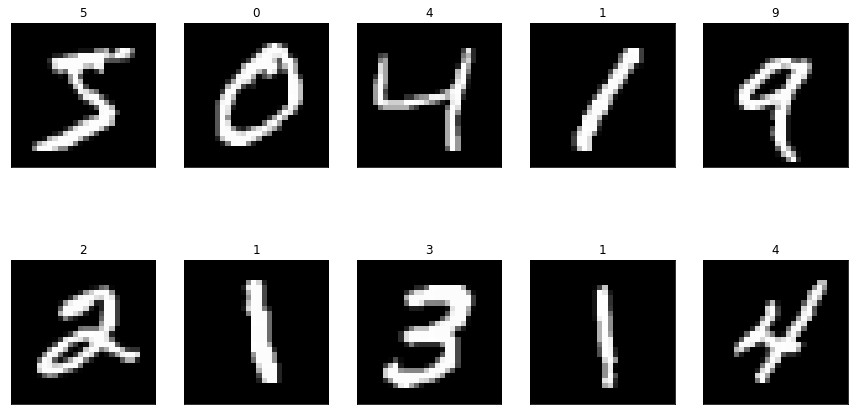

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_train, X_train, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

In [7]:
np.max(X_train[0])

255

### Normalize

In [8]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(28, 28, 1)

In [9]:
np.max(X_train[0])

1.0

# Zad
Przekopiuj architekturę:

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History

In [16]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
history_3 = History()
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping, history_3])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 40s 85ms/step - loss: 2.2837 - accuracy: 0.1336 - val_loss: 2.2576 - val_accuracy: 0.2127
Epoch 2/12
469/469 [==============================] - 39s 83ms/step - loss: 2.2406 - accuracy: 0.2287 - val_loss: 2.2044 - val_accuracy: 0.4240
Epoch 3/12
469/469 [==============================] - 38s 82ms/step - loss: 2.1846 - accuracy: 0.3243 - val_loss: 2.1350 - val_accuracy: 0.5816
Epoch 4/12
469/469 [==============================] - 38s 80ms/step - loss: 2.1106 - accuracy: 0.4103 - val_loss: 2.0435 - val_accuracy: 0.6716
Epoch 5/12
469/469 [==============================] - 39s 82ms/step - loss: 2.0165 - accuracy: 0.4792 - val_loss: 1.9232 - val_accuracy: 0.7126
Epoch 6/12
469/469 [==============================] - 37s 79ms/step - loss: 1.8947 - accuracy: 0.5253 - val_loss: 1.7707 - val_accuracy: 0.7305
Epoch 7/12
469/469 [==============================] - 37s 79ms/

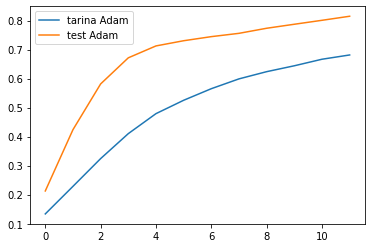

In [17]:
plt.plot(history_3.history['accuracy'], label = "tarina Adam")
plt.plot(history_3.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()